# Convolutional Neural Network

### Importing the libraries

In [30]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras import callbacks

In [2]:
tf.__version__

'2.9.2'

## Part 1 - Data Preprocessing

### Download the dataset

In [3]:
%%capture
!pip install --upgrade gdown
!gdown --id 1wNByyX2STBiJrgVqYyEtDRy8d9cTyyGg
!unzip /content/dataset.zip

### Preprocessing the Training set

In [99]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [100]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [101]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [102]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [103]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [104]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [105]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Fully Connected layer

In [106]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.2))

### Step 5 - Output Layer

In [107]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [108]:
cnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 6272)              0         
                                                                 
 dense_15 (Dense)            (None, 128)              

## Part 3 - Training the CNN

### Compiling the CNN

In [109]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Callback function initialization

In [110]:
callback = callbacks.EarlyStopping(monitor='val_loss', patience=4)

### Training the CNN on the Training set and evaluating it on the Test set

In [111]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 50, callbacks=[callback])

Epoch 1/50
250/250 [==============================] - 33s 129ms/step - loss: 0.6891 - accuracy: 0.5434 - val_loss: 0.6594 - val_accuracy: 0.6080
Epoch 2/50
250/250 [==============================] - 32s 128ms/step - loss: 0.6502 - accuracy: 0.6283 - val_loss: 0.6089 - val_accuracy: 0.6815
Epoch 3/50
250/250 [==============================] - 32s 128ms/step - loss: 0.6159 - accuracy: 0.6622 - val_loss: 0.6029 - val_accuracy: 0.6830
Epoch 4/50
250/250 [==============================] - 32s 128ms/step - loss: 0.5865 - accuracy: 0.6927 - val_loss: 0.5451 - val_accuracy: 0.7410
Epoch 5/50
250/250 [==============================] - 32s 128ms/step - loss: 0.5619 - accuracy: 0.7155 - val_loss: 0.5196 - val_accuracy: 0.7320
Epoch 6/50
250/250 [==============================] - 32s 128ms/step - loss: 0.5331 - accuracy: 0.7312 - val_loss: 0.5107 - val_accuracy: 0.7600
Epoch 7/50
250/250 [==============================] - 32s 128ms/step - loss: 0.5097 - accuracy: 0.7477 - val_loss: 0.4949 - val_ac

## Part 4 - Making a single prediction

In [112]:
import numpy as np
from keras.preprocessing import image
test_image = tf.keras.utils.load_img('/content/dataset/single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))
test_image_as_batch = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image_as_batch)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'
print(training_set.class_indices)

1/1 [==============================] - 0s 80ms/step
{'cats': 0, 'dogs': 1}


Model predicted: dog


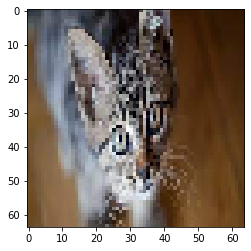

In [113]:
from matplotlib import pyplot as plt
plt.imshow(test_image)
print(f'Model predicted: {prediction}')

## Visualization of the Loss


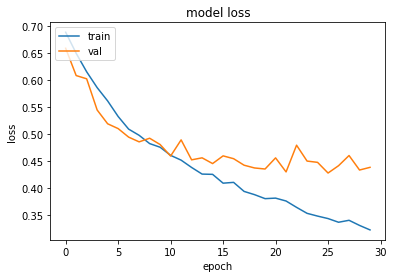

In [114]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

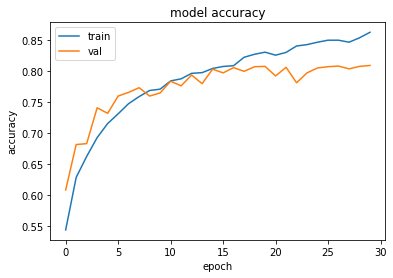

In [115]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [118]:
for key, val in history.history.items(): 
  print(f'{key} : {round(val[-1], 2)}')

loss : 0.32
accuracy : 0.86
val_loss : 0.44
val_accuracy : 0.81


In [117]:
accuracy = round(history.history['val_accuracy'][-1], 2)
print(f'The model accuracy is: {accuracy}')

The model accuracy is: 0.81
